# Introduction
Scenario - I work as a junior data analyst in Cyclistic company. The company till now focused on general awareness and brand appeal building but now the stakeholders feel that company's future success lies in converting more of causual riders to annual members.
* I am tasked to identify how annual vs casual riders use Cyclistic differently.
* I will approach the case study in Ask, Prepare, Process, Analyze, Share and  Act phases


# Ask 
The Ask phase is about being clear of the business task, In this case it is to identify the how causual vs annual riders use Cyclistic differently so that appropriate design strategy will be implemented. This is because, the marketing director and the marketing analysis team have came to the conclusion that an annual membership is much more profitable to the company in comparison to a casual membership. 2023 complete year dataset has been provided for analysis. Python will be used to prepare, process and Analyse the dataset.

# Prepare
In prepare phase we have to check that the data using ROCCC (Reliable, Original , Comprehensive, Current, Cited)method.
* After verifying the resource I found that the data is credible.
* Reliable and Original - Taken from [Motivate International Inc.](https://divvybikes.com/data-license-agreement)
* Comprehensive - Each month has around 5-6 lakhs of datapoints.
* Current and Cited - Latest data of 2023 has been taken
* I observed that the data is stored in a ".csv" format (comma seperated values) and that each data set has 13 variables.

# Process
As I have my data in 12 different .csv files. I will combine them into a simgle df to work with. I will clean the data as needed. 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

dataset_name = 'google-dataanalytics-capstone-project-dataset'
filepaths=['jan.csv','feb.csv','mar.csv','apr.csv','may.csv','jun.csv','jul.csv','aug.csv','sep.csv','oct.csv',
             'nov.csv','dec.csv']

dfs=[]
for filepath in filepaths:
  full_path = f"../input/{dataset_name}/{filepath}"
  df = pd.read_csv(full_path)
  dfs.append(df)

combined_df=pd.concat(dfs,ignore_index=True)
print(combined_df)
print(combined_df.shape)

                  ride_id  rideable_type           started_at  \
0        F96D5A74A3E41399  electric_bike  2023-01-21 20:05:42   
1        13CB7EB698CEDB88   classic_bike  2023-01-10 15:37:36   
2        BD88A2E670661CE5  electric_bike  2023-01-02 07:51:57   
3        C90792D034FED968   classic_bike  2023-01-22 10:52:58   
4        3397017529188E8A   classic_bike  2023-01-12 13:58:01   
...                   ...            ...                  ...   
5719872  F74DF9549B504A6B  electric_bike  2023-12-07 13:15:24   
5719873  BCDA66E761CC1029   classic_bike  2023-12-08 18:42:21   
5719874  D2CF330F9C266683   classic_bike  2023-12-05 14:09:11   
5719875  3829A0D1E00EE970  electric_bike  2023-12-02 21:36:07   
5719876  A373F5B447AEA508   classic_bike  2023-12-11 13:07:46   

                    ended_at           start_station_name start_station_id  \
0        2023-01-21 20:16:33  Lincoln Ave & Fullerton Ave     TA1309000058   
1        2023-01-10 15:46:05        Kimbark Ave & 53rd St     T

In [2]:
no_data = combined_df.isnull().sum()
print(no_data)

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    875716
start_station_id      875848
end_station_name      929202
end_station_id        929343
start_lat                  0
start_lng                  0
end_lat                 6990
end_lng                 6990
member_casual              0
dtype: int64


After inspection I found that the null values are empty string. So I will replace that with nan as pandas dropna will not drop empty strings. After droping the empty string our dataset shrinked from 5.7 M data points to 4.3 M data points. 

In [3]:
combined_df.replace('', np.nan, inplace=True)
combined_df = combined_df.dropna(how='any')
print(combined_df.shape)


(4331707, 13)


Next, for cleaning we will convert the started at and ended at column to datet time format. We will find the duration of each ride as it will be available in str and we cannot perform any analysis from it, we will create another column which will have total seconds from the duration column which will have int values. 

In [4]:
combined_df["started_at"]=pd.to_datetime(combined_df["started_at"], errors='coerce')
combined_df["ended_at"]=pd.to_datetime(combined_df["ended_at"], errors='coerce')

combined_df["duration"]= combined_df["ended_at"]-combined_df["started_at"]
combined_df['total_seconds'] = combined_df['duration'].dt.total_seconds()

def seconds_to_hms(seconds):
  if pd.isna(seconds):
    return "Nan"
  hours = seconds // 3600
  minutes = (seconds % 3600) // 60
  seconds = seconds % 60
  return f"{int(hours):02d}:{int(minutes):02d}:{int(seconds):02d}"

combined_df['ride_duration'] = combined_df['total_seconds'].apply(seconds_to_hms)
print(combined_df["ride_duration"])

0          00:10:51
1          00:08:29
2          00:13:14
3          00:08:46
4          00:15:19
             ...   
5719872    00:02:13
5719873    00:03:35
5719874    00:03:50
5719875    00:17:38
5719876    00:03:38
Name: ride_duration, Length: 4331707, dtype: object


# Analyze 
In this step we will analyze the data to support our business objective. I will examine the cleaned data to gain insights into the patterns and traits of casual riders versus member. I will find the max, mean of ride duration and on which day the frequency of riders is high. 

In [5]:
max_seconds=combined_df["total_seconds"].max()
print("Maximum Ride Duration ")
print(combined_df[combined_df["total_seconds"]==max_seconds]["ride_duration"])

Maximum Ride Duration 
1078713    202:16:18
Name: ride_duration, dtype: object


In [6]:
mean_seconds = combined_df["total_seconds"].mean()
mean_duration_str = seconds_to_hms(mean_seconds)
print("Average Ride Duration:", mean_duration_str)

Average Ride Duration: 00:15:57


In [7]:
combined_df["start_date"]=combined_df["started_at"].dt.dayofweek+1
combined_df["end_date"]=combined_df["ended_at"].dt.dayofweek+1

days={
  1: 'Sunday',
  2:'Monday',
  3:'Tuesday', 
  4:'Wednesday',
  5:'Thursday', 
  6:'Friday',
  7:'Saturday'
}

In [8]:
combined_df["day_of_week"]=combined_df["start_date"].map(days)
print("Mode of Day of week")
print(combined_df["day_of_week"].mode())

Mode of Day of week
0    Friday
Name: day_of_week, dtype: object


In here, we can see that casual riders spend more time riding as compared to members. On average casual person will ride 10 mins more than member. 

In [9]:
member_casual=combined_df.groupby("member_casual")["total_seconds"].mean()
print("Average of Member casual")
print(member_casual.apply(seconds_to_hms))

Average of Member casual
member_casual
casual    00:22:56
member    00:12:07
Name: total_seconds, dtype: object


Data Shows that Friday is when the longest and most number of rides have taken place. 

In [10]:
Days=combined_df.groupby("day_of_week")["total_seconds"].mean()
print("Average by Days")
print(Days.apply(seconds_to_hms))

Average by Days
day_of_week
Friday       00:19:22
Monday       00:14:12
Saturday     00:19:28
Sunday       00:14:58
Thursday     00:15:45
Tuesday      00:13:53
Wednesday    00:14:09
Name: total_seconds, dtype: object


In [11]:
ride_count_by_day=combined_df.groupby("day_of_week")["ride_id"].count()
print("Ride Count By day")
print(ride_count_by_day)

Ride Count By day
day_of_week
Friday       660811
Monday       630387
Saturday     562631
Sunday       562098
Thursday     628376
Tuesday      635813
Wednesday    651591
Name: ride_id, dtype: int64


In [12]:
bike_preference = combined_df.groupby("rideable_type")["member_casual"].count()
print("Bike Preference per Membership")
print(bike_preference)

Bike Preference per Membership
rideable_type
classic_bike     2690744
docked_bike        76124
electric_bike    1564839
Name: member_casual, dtype: int64


# Share
In this phase we share the insights obtained through previous phases. I have used power bi to create detailed visualisation for stakeholders. Below is the complete view of the dashboard. 

> 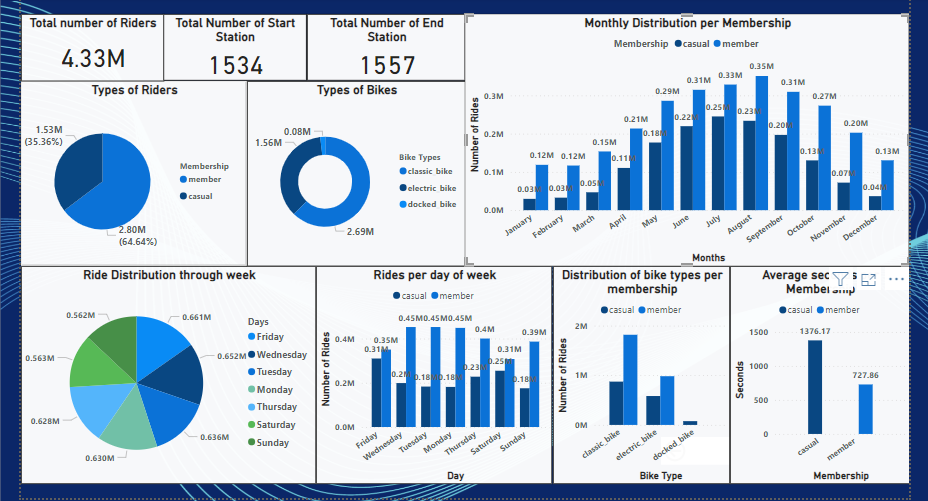]

## Distribution of Bike Types per Membership Type and Number of Rides
There is a huge difference between casual and member riders for any bike type. This shows that member riders take more rides on cyclistic than casual members. 

> 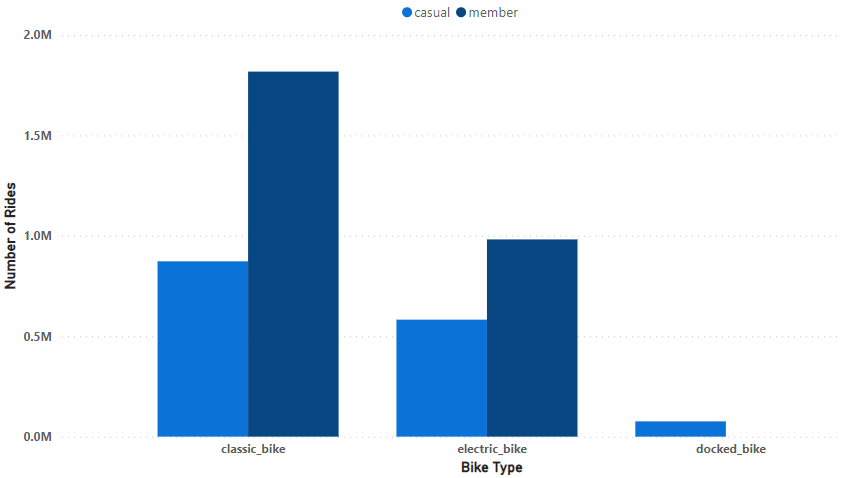]

## Ride Distribution through out week
This pie chart shows ride distribution for each day of the week. It shows that most rides are taken on weekdays such as Friday, Wednesday, Tuesday and Monday. 

> 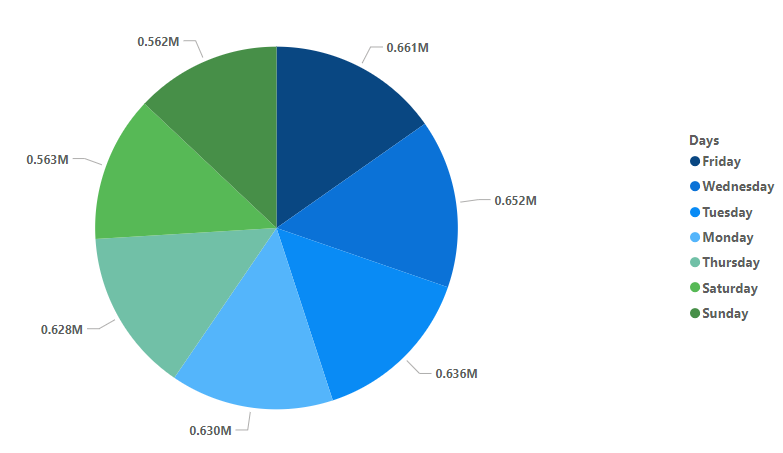]

## Day vs Number of Rides and Membership type
Casual riders take more rides on Friday, Saturday and Member riders take more rides on Wednesday, Thursday and Monday. 

> 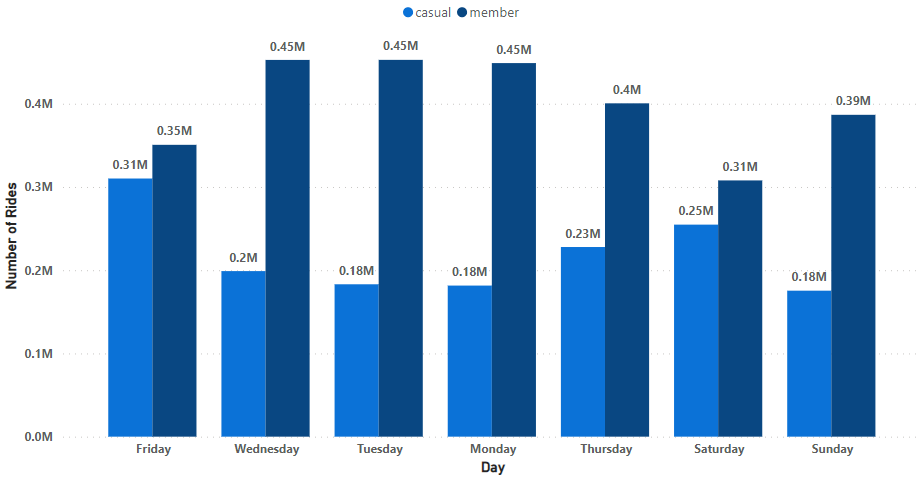]

## Month vs Number of Rides and Membership Type
Through out the year Member riders have more rides. This also shows that the months with most rides are July and August

> 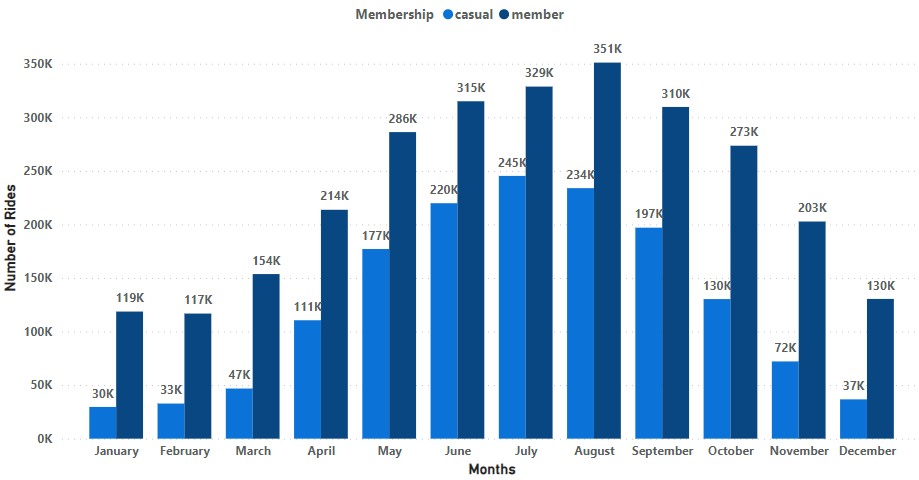]

## Membership Type vs Avg Duration of Rides
This visualisation is particularly interesting. This shows that casual riders take longer rides than member rides. 

> 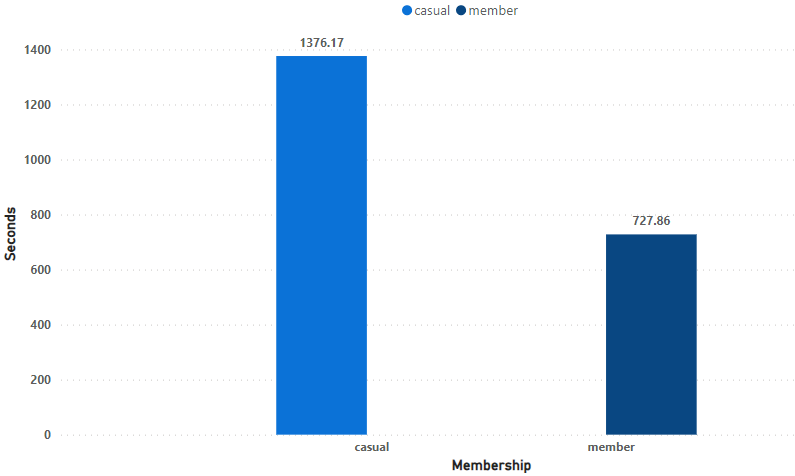]

* Through visualisatio we noticed that Casual Member take less rides and they are focused on Weekends while members are focused on Weekdays. This suggests that both the riders are using the cyclistic for different purpose. While Members must be using it for daily commute the causual riders must be using it for vacation travels. 
* This is also supported by the fact that Casual riders take less number of rides but longer rides suggesting they are using it on special occasions,while the member riders have more rides and of lesser duration supporting that they must be using it for daily commute. 
* We can see that casual riders have more rides during summer season of the year when the weather is particularly pleasant. 


# Act 



* The data shows a higher usage on weekends and a peak in the summer months. This suggests that casual riders are more active during these times. A marketing strategy could include introducing special weekend or summer passes to attract these riders. These passes could offer unlimited rides during the weekend or over the summer months at a discounted rate. 
* A focused campaign to promote the availability and benefits of classic bikes might attract more riders as it is most popular bike type. Highlighting it's ease of use and availability could encourage riders to consider more frequent rides or even memberships.
* Implementing a loyalty program for casual riders who use the service frequently. This program could offer benefits like discounts on future rides, which could be a stepping stone towards converting them into annual members.
